# Pointplot, Stripplot e Swarmplot: Mais distribuições e comparando pontos específicos

Na aula referente ao Capítulo 4 vimos que em certas situações podemos não estar interessados em visualizar toda a evolução de uma medida. No momento, não detinhamos as ferramentas necessárias para fazer esse gráfico, contudo com a introdução do `query` no Capítulo 5 estamos preparados para ver esse gráfico. Além disso, vamos continuar trabalhando com distribuições de dados: vamos ver como o pointplot é flexível e pode também ser usado para comparar distribuições de variáveis categóricas distintas, e também a introduzir o Swarmplot que tem a mesma função, mas exibindo cada uma de nossas observações.

Vamos importar nossos dados com a informação histórica do IDH.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idh = pd.read_csv("https://bit.ly/idh_tidy")

In [5]:
idh.head(3)

,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
0,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,1990,0.284,45.967,2.93646,0.871962,...,43.709,4.532768,1.493952,NaN,NaN,NaN,NaN,NaN,0.189279,10.694796
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,1990,0.649,73.144,11.57934,7.354632,...,70.050,11.988330,7.920670,5972.920553,NaN,NaN,45.22,50.78,1.675414,3.295066
2,DZA,Argélia,Alto,Países Árabes,93.0,1990,0.593,67.416,9.79789,4.614608,...,66.313,NaN,6.020075,NaN,3.157895,96.842105,NaN,NaN,3.007186,25.518074


# Como comparar pontos específicos: variação total com o pointplot

Já temos todo o arcabouço necessário para criar um gráfico que compare duas observações em um mesmo gráfico: por exemplo, o primeiro e último ano de uma dimensão do IDH de países diferentes, basta sabermos as categorias que queremos manter para fazer o `query`, como aprendemos no capítulo anterior. Além disso, basta mudarmos a função de plotagem para o `pointplot`.

Contudo, vamos ver como podemos ver a lista de categorias de uma variável categórica, para isso vamos usar o método `unique` do pandas.

In [6]:
# vamos selecionar a coluna usando colchetes e seu nome
idh["regiao"].unique()

array(['Ásia do Sul', 'Europa e Ásia Central', 'Países Árabes', nan,
       'África Sub-sahariana', 'América Latina e Caribe',
       'Ásia do Leste e Pacífico'], dtype=object)

O método `unique` retorna algo semelhante a uma lista com cada um dos valores únicos de uma variável categórica. Não precisamos nos preocupar com seu funcionamento, basta termos em mente que podemos usar códigos assim para ver as categorias existentes nos dados.

**ATENÇÃO**: Para que o Jupyter exiba o resultado do comando, ele deve ser a última linha da célula.

Vamos agora comparar a evolução da China, Brasil e Argentina entre 1990 e 2022.

In [51]:
paises_interesse = ["Brasil", "China", "Argentina"]

idh_paises = idh.query("pais in @paises_interesse")

Agora vamos manter apenas as observações de 1990 e 2022.

Perceba que estamos armazenando o resultado do `query` em uma variável nova, e em cada caso estamos dando um nome diferente para essa variável.

É importante usarmos essa nova variável quando quisermos usar o fultro que aplicamos.

In [59]:
anos_interesse = [1990, 2022]

df_comp_paises = idh_paises.query("ano in @anos_interesse")

Agora vamos criar nosso gráfico usando a componente de expectativa de educação do IDH.

<Axes: xlabel='ano', ylabel='idh_ee'>

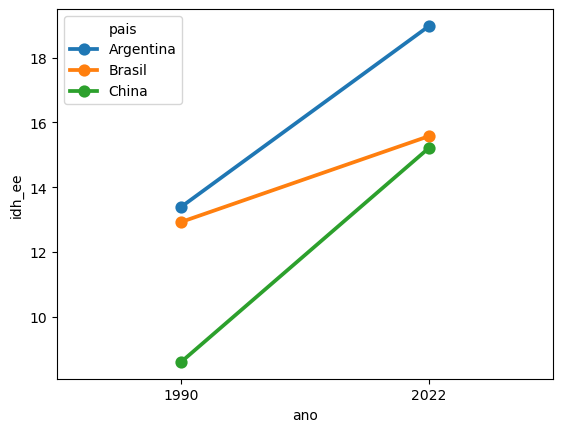

In [64]:
sns.pointplot(
    x="ano",
    y="idh_ee",
    hue="pais",
    data=df_comp_paises,
)


Poderíamos fazer vários ajustes no gráfico a partir do que já apreendemos, contudo, vamos prosseguir com nossas análises focando em usos das visualizações.

O pointplot é um gráfico extremamente versátil. Eles nos deixa criar visualizações como a que acabamos de criar, muito semelhante ao lineplot: Para isso podemos usar uma variável com informação temporal no Eixo X. 

Por outro lado, podemos fazer usos diferentes, por exemplo utilizando variáveis categóricas em um eixo e numérica no outro.

Vamos criar um dataframe apenas para 2022, e comparar a expectativa de educação entre países de diferentes níveis de IDH.

<Axes: xlabel='idh', ylabel='regiao'>

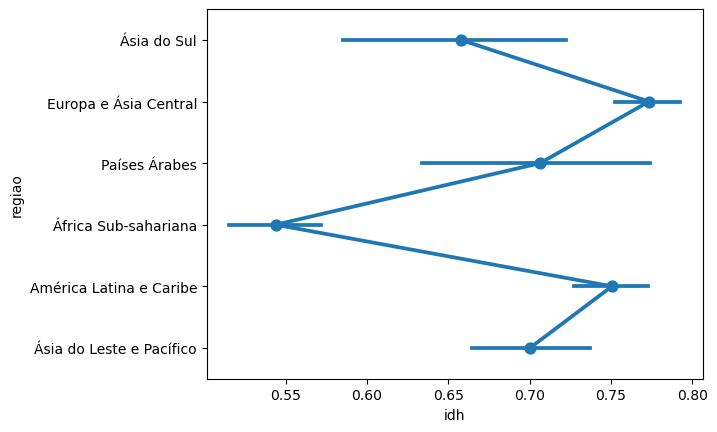

In [68]:
idh_2022 = idh.query("ano == 2022")

sns.pointplot(
    x="idh",
    y="regiao",
    data=idh_2022
)

O gráfico base pode parecer um tanto estranho, contudo com alguns ajustes podemos ter um gráfico bem interessante.

Devemos lembrar que cada ponto representa a média.

As linhas conectando os pontos podem nos ajudar a comparar com precisão a média entre os grupos, contudo não é estritamente necessária. Vamos removê-las usando o argumento `linestyle=""`.

<Axes: xlabel='idh', ylabel='regiao'>

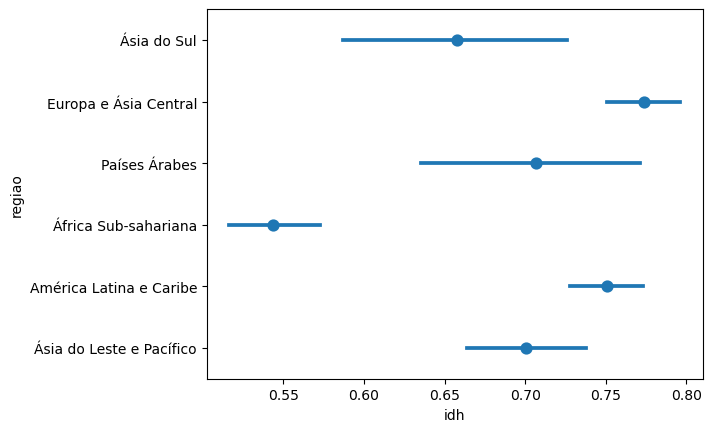

In [71]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    data=idh_2022
)

Agora, podemos fazer uma última dupla de ajustes interessantes.

Primeiro, vamos adicionar um detalhe apenas estético marcando o fim de cada barra de erro. Para isso vamos adicionar o argumento `capsize=0.2`. O valor numérico desse argumento serve para controlarmos o tamanho desse traço que marca o limite da barra de erro.

Ainda, vamos aprender a fazer um tipo de ajuste específico na barra de erro. Podemos usá-la de forma a exibir algo semelhante ao que vimos com o boxplot. Para isso vamos criar uma lista no seguinte formato: `["pi", X]`, onde `X` é um número entre 0 e 100 e é o percentual dos dados centrais que queremos que a barra de erro cubra. Para um comportamento semelhante ao barplot, podemos usar `["pi", 50]`. Assim, a barra de erro cobrirá 50% dos dados centrais mas terá a média como centra em vez da mediana (lembrando que por padrão o estimador usado é a média).

Estamos usando a função da barra de erro referente ao percential. Para mais detalhes, você pode [consultar a documentação relevante do seaborn](https://seaborn.pydata.org/tutorial/error_bars.html#percentile-interval-error-bars). Vamos tratar também desse assunto no curso de Ciência de Dados.


<Axes: xlabel='idh', ylabel='regiao'>

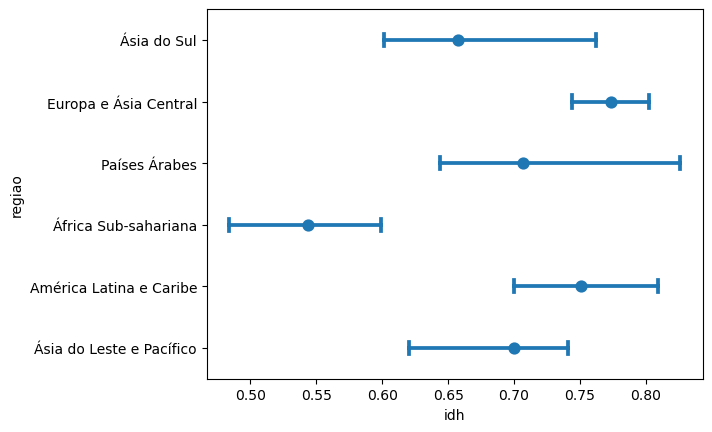

In [77]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    capsize=0.2,
    errorbar=["pi", 50],
    data=idh_2022
)

Poderíamos alterar o estimador para a mediana adicionando o argumento `estimator="median"`, contudo vamos manter a média.

Vamos adicionar uma última alteração alterando o gráfico para que ele exiba TODA a faixa das observações. Para isso, vamos mudar a parte numérica da barra de erro de `50` para `100`.

<Axes: xlabel='idh', ylabel='regiao'>

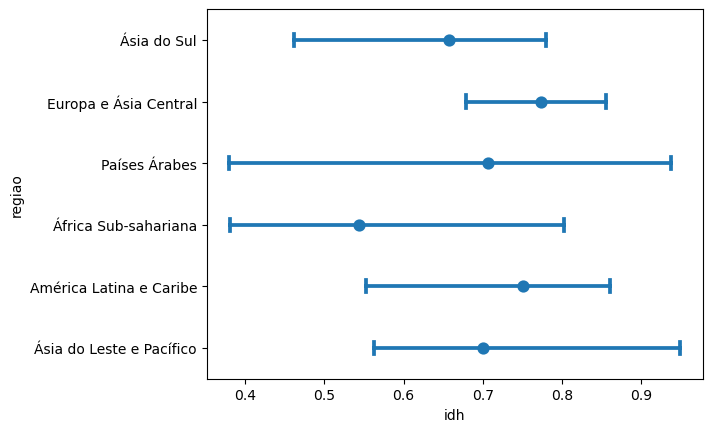

In [79]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    capsize=0.2,
    errorbar=["pi", 100],
    data=idh_2022
)

Isso mostra a versatilidade da função `pointplot`. Para checar mais usos, você pode [consultar sua documentação](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

Vimos agora outra forma de observar a distribuição de dados quando enfrentamos um problema que envolve uma variável categórica e uma numérica: primeiro com a função `boxplot` e agora com o `pointplot`. Nos dois casos poderíamos introduzir  outra variável categórica para fazer comparações mais intricadas, usando o argumento `hue`.


LIMITE DE NÃO TER IDEIA DO N

### Conclusão

Neste capítulo apresentamos ferramentas de análise complementares ao histograma, que também servem para entender como estão distribuídos os valores de uma variável numérica de nossa base. Aproveitamos para introduzir alguns conceitos básicos de estatística descritiva que nos ajudam nesse tipo de análise: a divisão da distribuição em quartis e o intervalo interquartil como medida de dispersão da variável. A partir dessa análise, aprendemos a ler um gráfico que é muito útil para a comparação de distribuições: o boxplot.

O código a seguir produz uma versão final de um boxplot criado para comparar os IDHs de países de três regiões da nossa base de IDH: África Sub-sahariana; a América Latina e Caribe; e a Europa e Ásia Central. 